# **Satisfacción de pasajeros aereos**

Este conjunto de datos contiene una encuesta de satisfacción de pasajeros de líneas aéreas. ¿Qué factores están altamente correlacionados con un pasajero satisfecho (o insatisfecho)? ¿Puede predecir la satisfacción de los pasajeros?

# **Contenido**
**Género:** Género de los pasajeros (Femenino, Masculino)

**Tipo de cliente:** el tipo de cliente (cliente fiel, cliente desleal)

**Edad:** La edad real de los pasajeros .

**Tipo de Viaje:** Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

**Clase:** Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

**Distancia de vuelo:** la distancia de vuelo de este viaje

**Servicio wifi a bordo:** Nivel de satisfacción del servicio wifi a bordo (0: No aplicable; 1-5)

**Hora de salida/llegada conveniente:** Nivel de satisfacción de la hora de salida/llegada conveniente

**Facilidad de reserva en línea:** Nivel de satisfacción de la reserva en línea

**Ubicación de la puerta:** nivel de satisfacción de la ubicación de la puerta

**Alimentos y bebidas:** Nivel de satisfacción de Alimentos y bebidas

**Embarque en línea:** Nivel de satisfacción del embarque en línea

**Comodidad del asiento:** Nivel de satisfacción de Confort del asiento

**Entretenimiento a bordo:** Nivel de satisfacción del entretenimiento a bordo

**Servicio a bordo:** Nivel de satisfacción del servicio a bordo

**Servicio de sala de piernas:** Nivel de satisfacción del servicio de sala de piernas

**Manejo de equipaje:** Nivel de satisfacción del manejo de equipaje

**Servicio de Check-in:** Nivel de satisfacción del servicio de Check-in

**Limpieza:** Nivel de satisfacción de Limpieza

**Retraso de salida:** Minutos de retraso en la salida

**Retraso de llegada:** Minutos de retraso en la llegada

**Satisfacción:** Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)

# **Objetivo**

No todos de estos vuelos salen puntuales, ¿que pasa con estos vuelos ?, ¿cuales son las causas principales de satisfaccion en los vuelos?

Este conjunto de datos contiene una encuesta sobre la satisfacción de los pasajeros aéreos. Se plantea el siguiente problema de clasificación:

Es necesario predecir a cuál de los dos niveles de satisfacción con la aerolínea pertenece el pasajero:

Satisfacción
Neutral o insatisfecho

# Análisis exploratorio
Para comenzar este análisis exploratorio, primero use `matplotlib` para importar bibliotecas y definir funciones para graficar los datos. En función de los datos, no se realizarán todas las parcelas.


Tenemos 24 columnas de datos, algunas son categóricas (por ejemplo, género y satisfacción), algunas son enteras (por ejemplo, edad, distancia de vuelo), una es flotante (retraso de llegada en minutos). Muchos contienen valores discretos entre 0 y 5 que probablemente se recopilaron mediante encuestas de satisfacción del cliente.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # álgebra lineal
import os # accediendo a la estructura del directorio

In [ ]:
import pandas as pd
from google.colab import drive
import os 
drive.mount('/content/dgrive')

Mounted at /content/dgrive


In [ ]:
import seaborn as sns
import missingno as msno

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd '/content/dgrive/MyDrive/Python/Colab Notebooks (1)/Entrega de trabajos/Desafio 1 /Satisfacción de los pasajeros'
SPA= pd.read_csv('/content/dgrive/MyDrive/Python/Colab Notebooks/Entrega de trabajos/Desafio 1 /Satisfacción de los pasajeros/airline_passenger_satisfaction.csv',index_col=0)
SPA.head()

[Errno 2] No such file or directory: '/content/dgrive/MyDrive/Python/Colab Notebooks (1)/Entrega de trabajos/Desafio 1 /Satisfacción de los pasajeros'
/content


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Cada fila corresponde a un pasajero y cada columna a una característica específica.

In [ ]:
SPA = SPA.assign(Cantidad=1)
SPA.shape

(129880, 24)

In [ ]:
max(SPA['Arrival Delay'])

1584.0

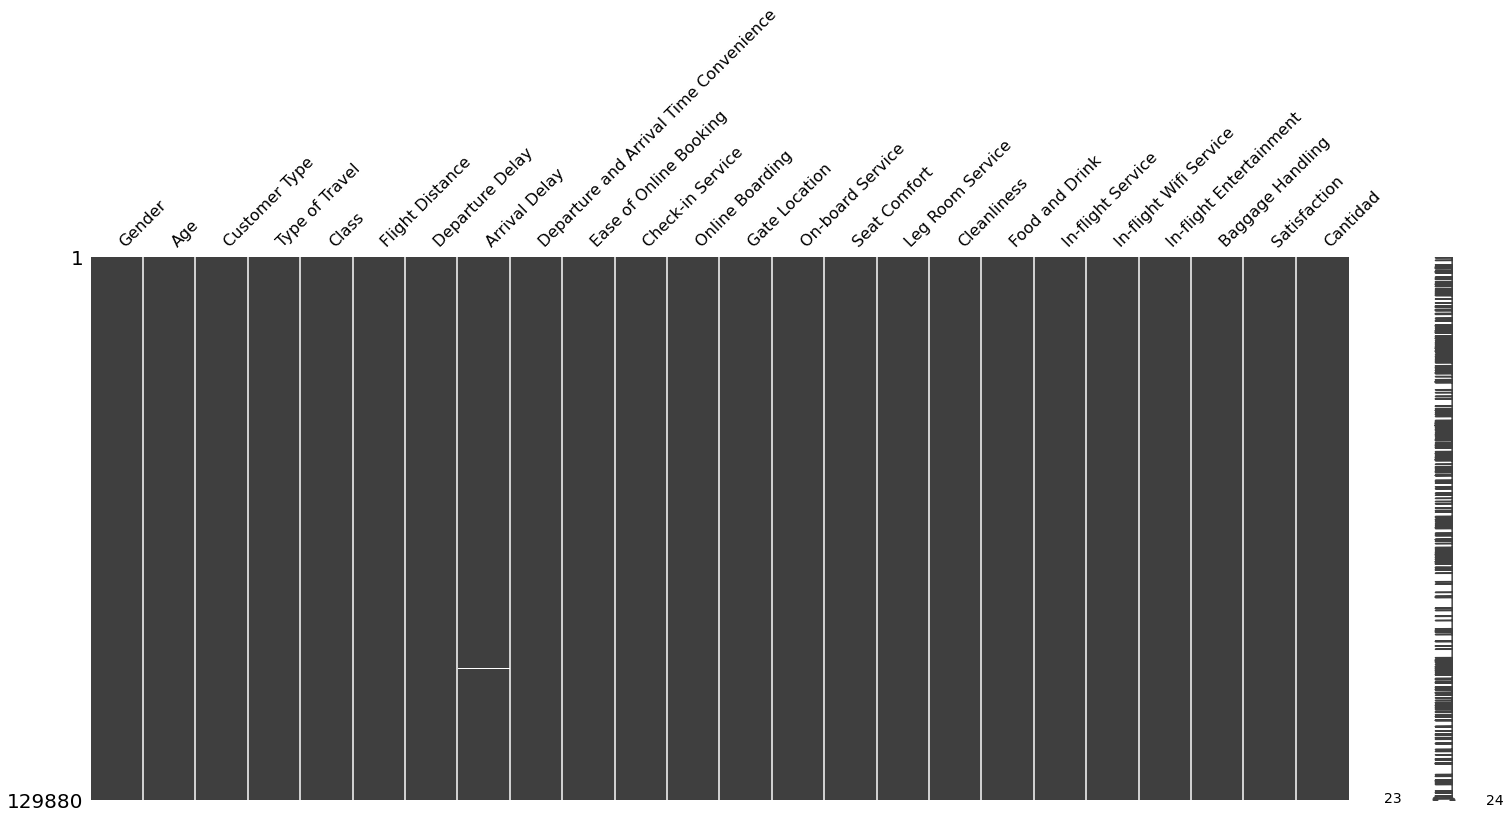

In [ ]:
msno.matrix(SPA)

In [ ]:
SPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298


Puede notar lo siguiente:

La columna correspondiente a la función "Arrival Delay" en minutos tiene 393 valores faltantes.

Muchas columnas contienen valores categóricos pero son del tipo 'objeto' o 'int64'. Reemplacé este tipo con uno especial diseñado para almacenar valores categóricos.

In [ ]:
categorical_indexes = [0,2,3,4,23] + list(range(8, 22))
SPA.iloc[:,categorical_indexes] = SPA.iloc[:,categorical_indexes].astype('category')

In [ ]:
SPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  129880 non-null  category
 1   Age                                     129880 non-null  int64   
 2   Customer Type                           129880 non-null  category
 3   Type of Travel                          129880 non-null  category
 4   Class                                   129880 non-null  category
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Arrival Delay                           129487 non-null  float64 
 8   Departure and Arrival Time Convenience  129880 non-null  category
 9   Ease of Online Booking                  129880 non-null  category
 10  Check-in Service                

In [ ]:
SPA.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Para cada atributo cuantitativo, se dan los valores medios, la desviación estándar, los valores mínimo y máximo, la mediana y los valores del cuartil.

Ahora obtenemos información sobre características categóricas:

In [ ]:
SPA.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Cantidad
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,6,6,6,5,1
top,Female,Returning,Business,Business,4,3,4,4,3,4,4,4,4,4,4,2,4,4,1
freq,65899,106100,89693,62160,31880,30393,36333,38468,35717,38703,39756,35886,33969,30563,47323,32320,36791,46761,129880


Para cada característica categórica, se proporciona el número total de valores, el número de valores únicos, el elemento que aparece con mayor frecuencia y el número total de tales elementos.


## Verificacion de nulos

In [ ]:
sum(SPA.isnull().sum())

393

## Verificacion de duplicados

In [ ]:
print(SPA.shape)
SPA= SPA.drop_duplicates()
print(SPA.shape)

(129880, 24)
(129880, 24)


## Comprension de la estructura de la data (inicial)

In [ ]:
# Parte 1
df_class=SPA[SPA['Arrival Delay'] == 50].iloc[:,10:60]
lista=df_class.values[0]
lista

array([3, 3, 3, 2, 2, 2, 1, 4, 2, 2, 2, 2, 'Neutral or Dissatisfied', 1],
      dtype=object)

Para cada atributo cuantitativo, se dan los valores medios, la desviación estándar, los valores mínimo y máximo, la mediana y los valores del cuartil.

In [ ]:
SPA.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
Clase_Agrupado = SPA.groupby('Class')[['Flight Distance','Age','Departure Delay','Arrival Delay']].mean()
Clase_Agrupado

,Flight Distance,Age,Departure Delay,Arrival Delay
Class,,,,
Business,1676.088256,41.617278,14.304585,14.491805
Economy,743.998199,37.206863,15.083829,15.615465
Economy Plus,747.089151,38.728934,15.122835,15.803198


In [ ]:
Satisfaccion_Agrupado = SPA.groupby('Satisfaction')[['Flight Distance','Age','Departure Delay','Arrival Delay']].mean()
Satisfaccion_Agrupado

,Flight Distance,Age,Departure Delay,Arrival Delay
Satisfaction,,,,
Neutral or Dissatisfied,929.715420,37.650997,16.406837,17.055992
Satisfied,1529.539165,41.741015,12.509782,12.533859


In [ ]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.2 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 34.1 MB/s 
     |████████████████████████████████| 690 kB 45.4 MB/s 
     |████████████████████████████████| 296 kB 48.7 MB/s 
     |████████████████████████████████| 1.6 MB 46.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d6a48c435cefbb91ccae376f01201f8c1e5247ecf6ad0e6e79b17c911368e570
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Graficos

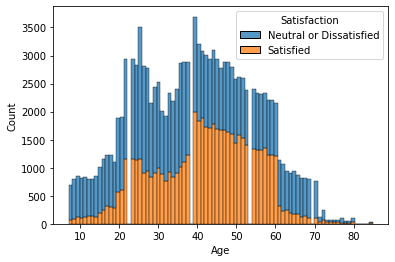

In [ ]:
sns.histplot(data=SPA, x="Age", hue="Satisfaction", multiple="stack")

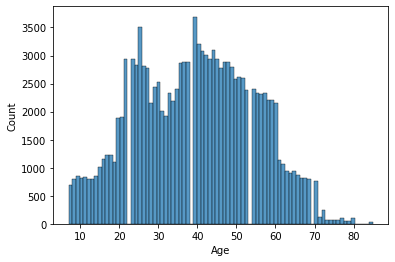

In [ ]:
sns.histplot(data=SPA, x="Age")

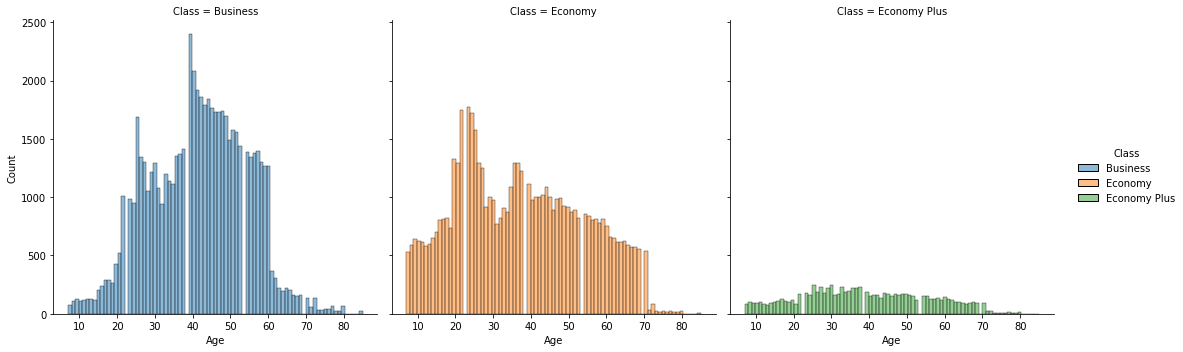

In [ ]:
sns.displot(data=SPA, x="Age", hue="Class", col="Class")

In [ ]:
import seaborn as sns

1-¿Cuál es el promedio de edad de los clientes satisfechos en los vuelos analizados?

 2- Según la clase que eligieron los pasajeros para viajar, ¿cual fue la que recorrió una mayor distancia? 

3-¿Cómo se distribuye las notas de los atributos de comodidad dentro del avión entre las distintas clases? 

In [ ]:
# 1- ¿Cuál es el promedio de edad de los clientes satisfechos en los vuelos analizados? 
Clientes_Satisfechos = SPA.loc[(SPA['Satisfaction'] == 'Satisfied'), ['Gender','Age','Cantidad']]
Clientes_Satisfechos

,Gender,Age,Cantidad
ID,,,
2,Female,35,1
3,Male,41,1
4,Male,50,1
5,Female,49,1
6,Male,43,1
...,...,...,...
129864,Female,39,1
129865,Male,38,1
129867,Female,20,1


In [ ]:
|#Calculo del promedio de edad de clientes satisfechos e insatisfechos / neutrales
Promedio_Edad_Satisfaccion = SPA.groupby('Satisfaction')[['Age',]].mean()
Promedio_Edad_Satisfaccion

,Age
Satisfaction,
Neutral or Dissatisfied,37.650997
Satisfied,41.741015


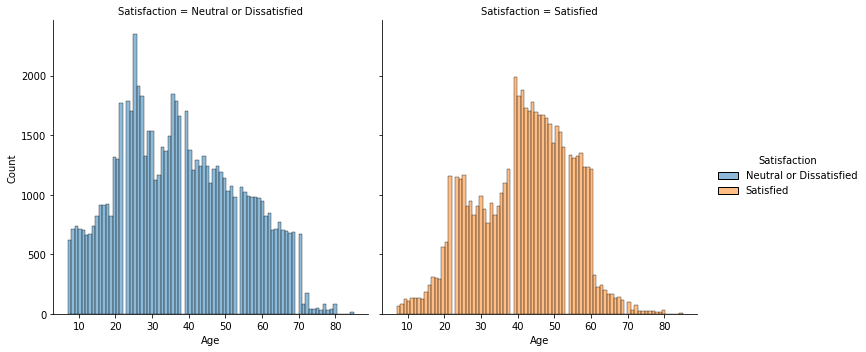

In [ ]:
sns.displot(data=SPA, x="Age", hue="Satisfaction", col="Satisfaction")

De los 56428 clientes satisfechos, el promedio de edad es de 41.7 años,   en cambio los neutrales o insatisfechos es de 4 años menos (37.6 años)

In [ ]:
Distancia_Clase = SPA.groupby('Class')[['Flight Distance','Cantidad']].sum()
Distancia_Clase

,Flight Distance
Class,
Business,104185646
Economy,43381791
Economy Plus,7030856


Se puede identificar que Business fue la clase que tuvo una mayor distancia recorrida. Asimismo identificamos que también fue la más elegida por los pasajeros que respondieron las encuestas. 

Ahora obtenemos información sobre características categóricas:

In [ ]:
SPA.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Cantidad
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,6,6,6,5,1
top,Female,Returning,Business,Business,4,3,4,4,3,4,4,4,4,4,4,2,4,4,1
freq,65899,106100,89693,62160,31880,30393,36333,38468,35717,38703,39756,35886,33969,30563,47323,32320,36791,46761,129880



Para cada característica categórica, se proporciona:
 , ,  

1.   El número total de valores
2.   El número de valores únicos
3.   El elemento de lista que aparece con mayor frecuencia
4.   Y el número total de dichos elementos

**Veamos la relación de los valores de la variable objetivo:**

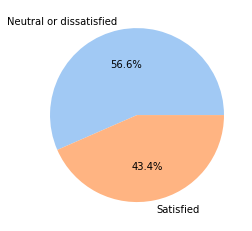

In [ ]:
plt.pie(SPA.Satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("pastel"), autopct = '%1.1f%%')
pass

# Analisis Univariado

In [ ]:
SPA.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Cantidad'],
      dtype='object')

## Medidas de tendencia central (1 momento)

La moda simplemente es el valor mas frecuente

In [ ]:
from scipy import stats
stats.describe(SPA['Departure Delay'])

DescribeResult(nobs=129880, minmax=(0, 1592), mean=14.713712657838004, variance=1449.4106512812416, skewness=6.821901522036001, kurtosis=100.64062560831256)

In [ ]:
stats.gmean(SPA['Departure Delay']) # Media geometrica

0.0

In [ ]:
stats.hmean(SPA['Departure Delay']) # Media armonica

0.0

In [ ]:
stats.trim_mean(SPA['Departure Delay'],0.1) # Media recortada (Proporcion removida en cada cola 10%)

5.797553510933169

In [ ]:
stats.mode(SPA['Departure Delay']) # Moda

ModeResult(mode=array([0]), count=array([73356]))

## Medidas de localizacion

In [ ]:
import numpy as np
np.percentile(SPA['Departure Delay'], [25,75,90])

array([ 0., 12., 44.])

In [ ]:
import numpy as np
np.percentile(SPA['Departure Delay'], [0,25,75,100]) #cuartiles

array([   0.,    0.,   12., 1592.])

In [ ]:
import numpy as np
np.percentile(SPA['Departure Delay'], [np.arange(0,100,10)]) #deciles

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 19., 44.]])

## Absolutas

In [ ]:
stats.describe(SPA['Departure Delay'])[3] # varianza

1449.4106512812416

In [ ]:
np.sqrt(stats.describe(SPA['Departure Delay'])[3]) # sd

38.07112621503653

In [ ]:
stats.iqr(SPA['Departure Delay']) # Calcular el IQR

12.0

In [ ]:
from numpy import mean, absolute

def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
mad(SPA['Departure Delay']) # MAD

20.155586915462184

In [ ]:
(np.percentile(SPA['Departure Delay'],75)-np.percentile(SPA['Departure Delay'],25))/2 # Quartile Deviation

6.0

## Relativas

In [ ]:
stats.variation(SPA['Departure Delay']) # Calcular el coeficiente de variacion (CV)

2.587448901401294

In [ ]:
(np.percentile(SPA['Departure Delay'],75)-np.percentile(SPA['Departure Delay'],25))/(np.percentile(SPA['Departure Delay'],75)+np.percentile(SPA['Departure Delay'],25)) # CV Quartile Deviation

1.0

In [ ]:
stats.sem(SPA['Departure Delay']) # Calcular el Error estandar

0.10563907366221251

## Medidas de asimetria y kurtosis (3er y 4to momento)

In [ ]:
stats.skew(SPA['Departure Delay']) # Calcular asimetria

6.821901522036001

In [ ]:
stats.kurtosis(SPA['Departure Delay'])-3 # Calcular el kurtosis

97.64062560831256

(array([1.29203e+05, 6.19000e+02, 3.80000e+01, 1.10000e+01, 7.00000e+00,
        1.00000e+00, 1.00000e+00]),
 array([   0.        ,  227.42857143,  454.85714286,  682.28571429,
         909.71428571, 1137.14285714, 1364.57142857, 1592.        ]),
 <a list of 7 Patch objects>)

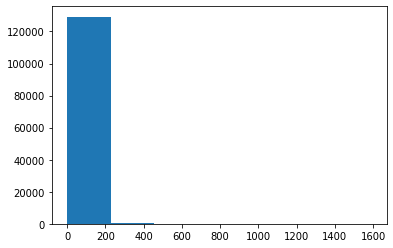

In [ ]:
import matplotlib.pyplot as plt
plt.hist(SPA['Departure Delay'],bins=7)

## Graficos univariados

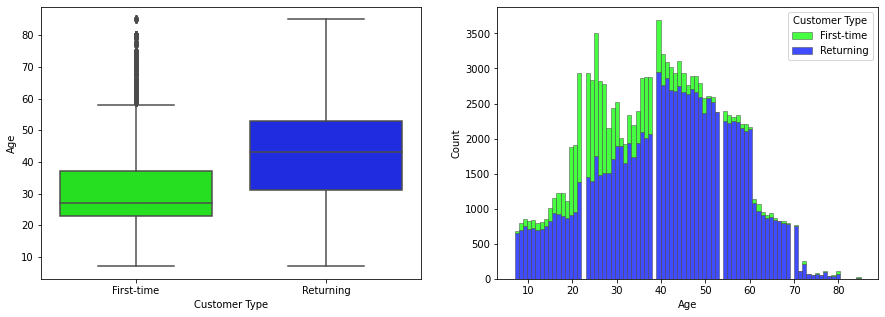

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "hsv", data = SPA, ax = ax[0])
sns.histplot(SPA, x = "Age", hue = "Customer Type", multiple = "stack", palette = "hsv", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

A partir de este diagrama de cajas, podemos concluir que la mayoría de los clientes regulares de la aerolínea tienen entre 30 y 55 años (su edad promedio es ligeramente superior a los 40). El rango de edad de los clientes no regulares es un poco más pequeño (de 25 a 38 años, en promedio, un poco menos de 30)

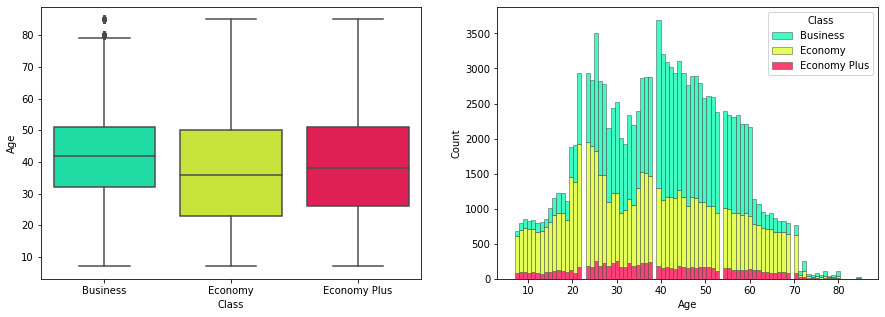

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "gist_ncar", data = SPA, ax = ax[0])
sns.histplot(SPA, x = "Age", hue = "Class", multiple = "stack", palette = "gist_ncar", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Se puede observar que, en promedio, el rango de edad de aquellos clientes que viajan en clase ejecutiva es el mismo (según el cuadro anterior) que el rango de edad de los clientes regulares. Con base en esta observación, se puede suponer que los clientes habituales compran principalmente la clase ejecutiva para ellos mismos.

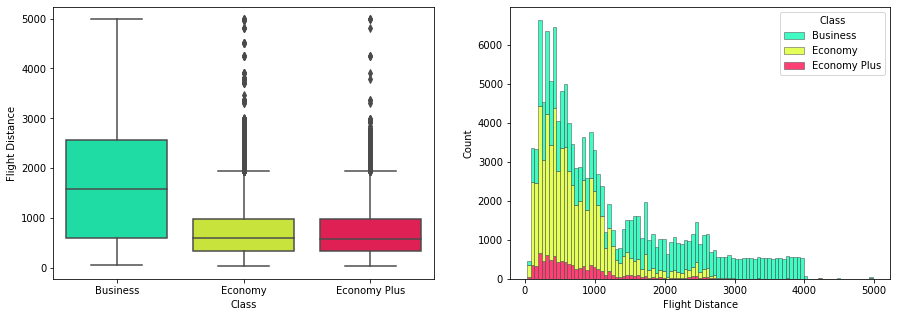

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gist_ncar", data = SPA, ax = ax[0])
sns.histplot(SPA, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gist_ncar", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Los clientes cuya distancia de vuelo es larga, en su mayoría vuelan en clase ejecutiva.

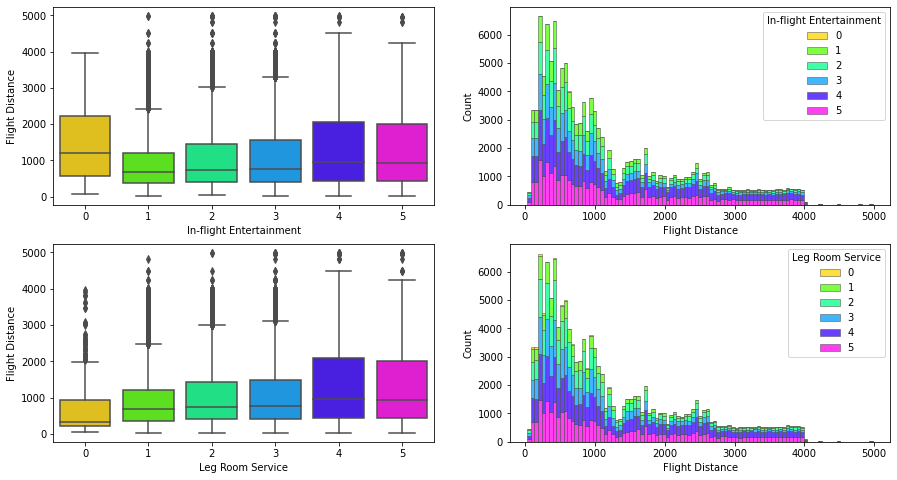

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "In-flight Entertainment", y = "Flight Distance", palette = "hsv", data = SPA, ax = ax[0, 0])
sns.histplot(SPA, x = "Flight Distance", hue = "In-flight Entertainment", multiple = "stack", palette = "hsv", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg Room Service", y = "Flight Distance", palette = "hsv", data = SPA, ax = ax[1, 0])
sns.histplot(SPA, x = "Flight Distance", hue = "Leg Room Service", multiple = "stack", palette = "hsv", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass


Se puede observar el siguiente patrón: cuanto más distancia viaja un pasajero de avión (respectivamente, cuanto más tiempo está en vuelo), más satisfecho está con el entretenimiento en vuelo y el espacio adicional para las piernas (en promedio).

**Diagrama de dispersión para 'Departure delay' y 'Arrival delay'**

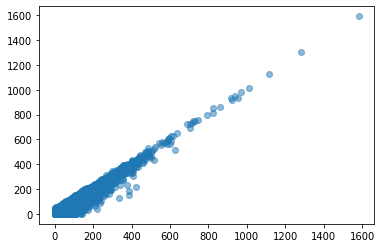

In [ ]:
plt.scatter(SPA['Arrival Delay'], SPA['Departure Delay'], alpha = 0.5)
pass

# Analisis Bivariado


**Calculemos la matriz de correlación para características cuantitativas y usemos la imagen visual de esta matriz:**

In [ ]:
corr_mat = SPA.corr()
corr_mat

,Age,Flight Distance,Departure Delay,Arrival Delay
Age,1.000000,0.099459,-0.009041,-0.011248
Flight Distance,0.099459,1.000000,0.002402,-0.001935
Departure Delay,-0.009041,0.002402,1.000000,0.965291
Arrival Delay,-0.011248,-0.001935,0.965291,1.000000


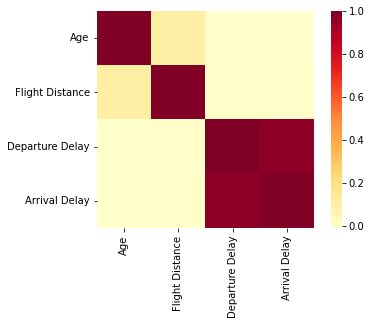

In [ ]:
sns.heatmap(corr_mat, square = True, cmap = 'YlOrRd')
pass

Puede ver que existe una fuerte correlación entre las funciones 'Departure delay' y 'Arrival delay'. El valor del coeficiente de correlación alcanza el siguiente valor: 0.965291

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay  Arrival Delay    0.965291
dtype: float64


Puede ver que los puntos se alinearon más o menos a lo largo de una línea recta que va desde la esquina inferior izquierda hasta la esquina superior derecha. Por lo tanto, en alguna aproximación, la dependencia del retraso del tiempo de llegada con respecto al retraso del tiempo de salida es lineal.

Los resultados obtenidos son bastante lógicos y se pueden explicar de la siguiente manera. Si el vuelo de los clientes de la aerolínea se retrasó una cierta cantidad de tiempo en la salida, entonces el vuelo se retrasará aproximadamente la misma cantidad de tiempo en el aterrizaje.

**Ahora considere los gráficos de dependencia de algunas características categóricas en el objetivo: satisfacción de los pasajeros aéreos:**

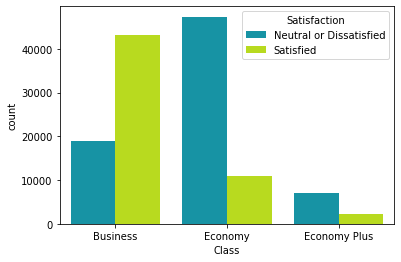

In [ ]:
sns.countplot(x = 'Class', hue = 'Satisfaction', palette = "nipy_spectral", data = SPA)
plt.show()

Este gráfico es muy revelador. Puede ver que la mayoría de los pasajeros que volaron en clase económica plus o clase económica no estaban satisfechos con el vuelo, y los que tuvieron la suerte de volar en clase ejecutiva estaban satisfechos.

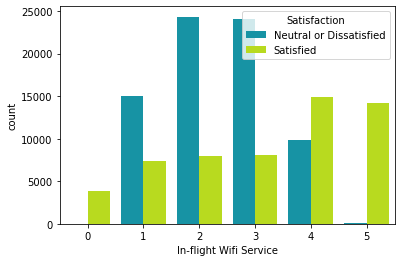

In [ ]:
sns.countplot(x = 'In-flight Wifi Service', hue = 'Satisfaction', palette = "nipy_spectral", data = SPA)
plt.show()

De acuerdo con este gráfico, puede ver que casi todos los pasajeros que calificaron el servicio wifi con 5 de 5 puntos estaban satisfechos con el vuelo.

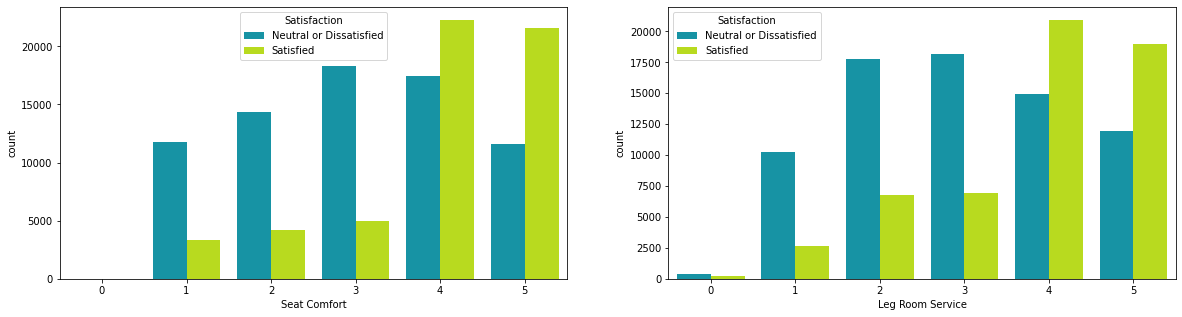

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat Comfort', hue = 'Satisfaction', palette = "nipy_spectral", data = SPA,ax = ax[0])
sns.countplot(x = 'Leg Room Service', hue = 'Satisfaction', palette = "nipy_spectral", data = SPA, ax = ax[1])
plt.show()

De los gráficos anteriores, podemos concluir lo siguiente: la mayoría de los pasajeros que calificaron la comodidad de los asientos y el espacio adicional para las piernas con 4 y 5 puntos sobre 5 estaban satisfechos con el vuelo.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 81 kB/s 
     |████████████████████████████████| 102 kB 5.4 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 9.9 MB 47.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=cd472bdf7243fa73612dd9ebdd8442410156b5dc9cd3ffd63da71a298a4b41b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-of8ey_54/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Att

Ahora se debe reiniciar el kernel (**Importante**)


In [ ]:
#Importamos las librerias
# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling
# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas profiling

In [ ]:
#Data Profiling
profile = pandas_profiling.ProfileReport(SPA)
profile

## Dependencias intervalo-intervalo

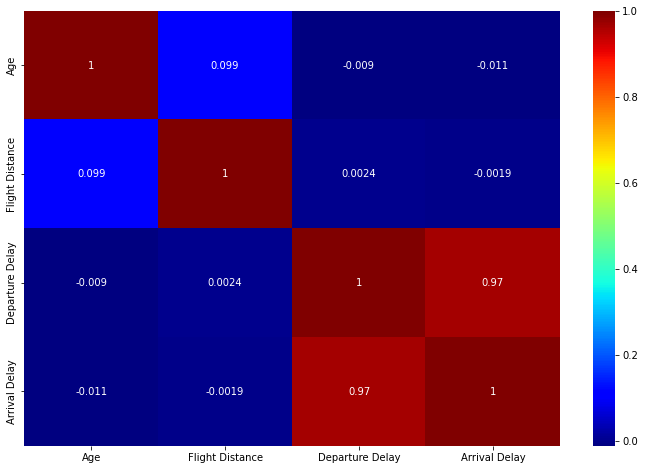

In [ ]:
#Correlaciones de Pearson
plt.figure(figsize=(12, 8))
vg_corr = SPA.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True,cmap='jet');

**Significancia**

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = SPA.corr()
rho

,Age,Flight Distance,Departure Delay,Arrival Delay
Age,1.000000,0.099459,-0.009041,-0.011248
Flight Distance,0.099459,1.000000,0.002402,-0.001935
Departure Delay,-0.009041,0.002402,1.000000,0.965291
Arrival Delay,-0.011248,-0.001935,0.965291,1.000000


In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = SPA.corr()
pval = SPA.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape) # quitar de la diagonal los unos con np.eye
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01] if x<=t]))
rho.round(2).astype(str) + p

,Age,Flight Distance,Departure Delay,Arrival Delay
Age,1.0*,0.1*,-0.01*,-0.01*
Flight Distance,0.1*,1.0*,0.0,-0.0
Departure Delay,-0.01*,0.0,1.0*,0.97*
Arrival Delay,-0.01*,-0.0,0.97*,1.0*


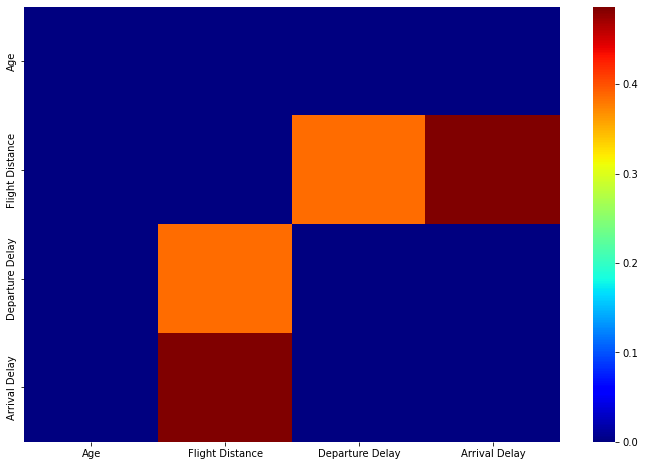

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pval,cmap='jet')

In [ ]:
df_t=SPA.groupby(by='Flight Distance').mean()[['Arrival Delay','Departure Delay','Age']].reset_index()
df_t.head()

,Flight Distance,Arrival Delay,Departure Delay,Age
0,31,5.090909,4.454545,35.000000
1,56,13.636364,12.727273,35.363636
2,67,25.062500,22.175000,41.481250
3,73,35.623377,31.688312,41.311688
4,74,10.547619,10.666667,37.690476


In [ ]:
df_f=pd.melt(df_t, id_vars='Flight Distance')
df_f.head()

,Flight Distance,variable,value
0,31,Arrival Delay,5.090909
1,56,Arrival Delay,13.636364
2,67,Arrival Delay,25.062500
3,73,Arrival Delay,35.623377
4,74,Arrival Delay,10.547619


(array([   0,    1,    2, ..., 3818, 3819, 3820]),
 <a list of 3821 Text major ticklabel objects>)

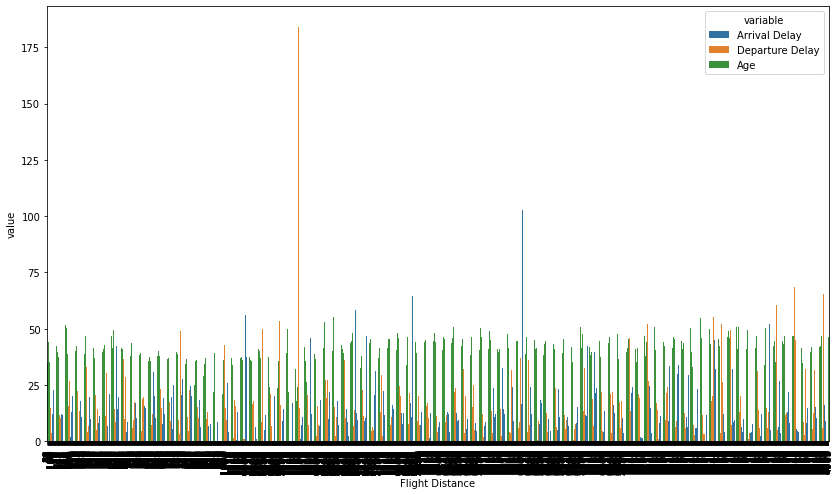

In [ ]:
import seaborn as sns 
plt.figure(figsize=(14,8))
sns.barplot(x='Flight Distance',y='value',hue='variable',data=df_f)
plt.xticks(rotation=90)

**Hexbin plot**

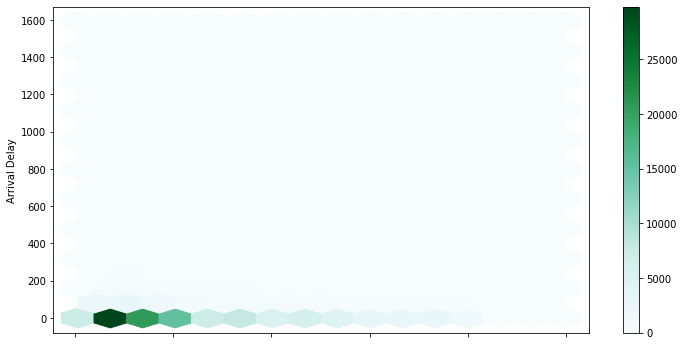

In [ ]:
SPA.plot.hexbin(x='Flight Distance', y='Departure Delay',gridsize=(15,10),xlabel='', ylabel='Arrival Delay',figsize=(12,6))

**Scatter**

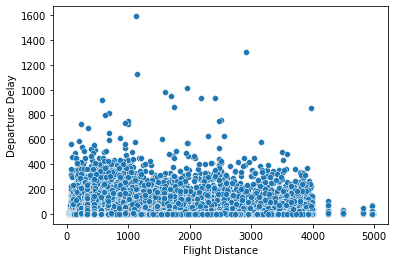

In [ ]:
sns.scatterplot(x='Flight Distance',y='Departure Delay',data=SPA)

## Dependencias categoricas vs Categoricas

In [ ]:
#Ejemplo: Categórica vs. categórica
import pandas as pd
t=pd.crosstab(SPA.Satisfaction, SPA.Class)
t

Class,Business,Economy,Economy Plus
Satisfaction,,,
Neutral or Dissatisfied,18994,47366,7092
Satisfied,43166,10943,2319


In [ ]:
pd.crosstab(SPA.Satisfaction, SPA.Class, normalize=True) #Agregamos los valores en relativo

Class,Business,Economy,Economy Plus
Satisfaction,,,
Neutral or Dissatisfied,0.146243,0.364690,0.054604
Satisfied,0.332353,0.084255,0.017855


**Prueba chi cuadrado para dependencia**

In [ ]:
from scipy.stats import chi2_contingency
# Chi-square test para independencia. 
c, p, dof, expected = chi2_contingency(t) 
# sacar el p valor
print(p)

0.0


**Coeficiente de correlacion de Cramer**

In [ ]:
obs = np.sum(t).sum() # Numero de observaciones
mini = min(t.shape)-1 # Take the minimum value between the columns and the rows of the cross table
c/(obs*mini)

0.2533582680833317

##Dependencias categoricas vs numericas

In [ ]:
SPA.Satisfaction.unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

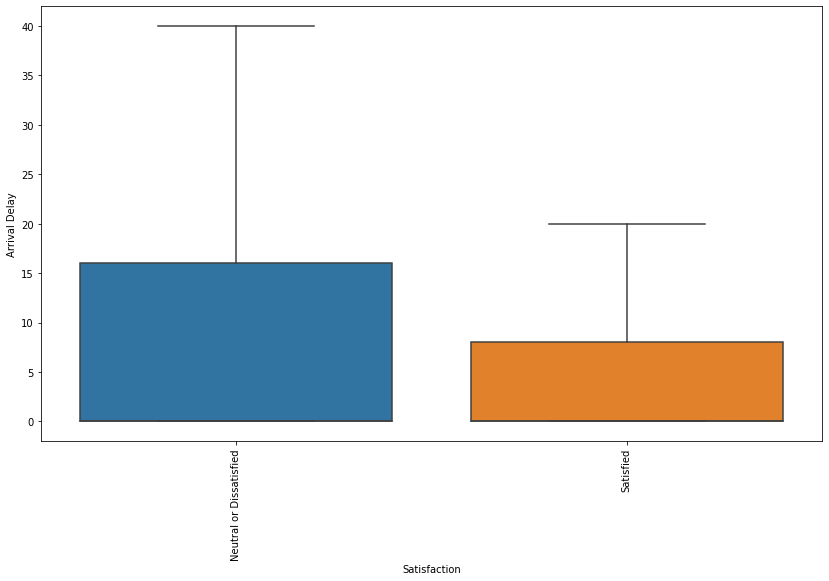

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Satisfaction',y='Arrival Delay',data=SPA,showfliers=False)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

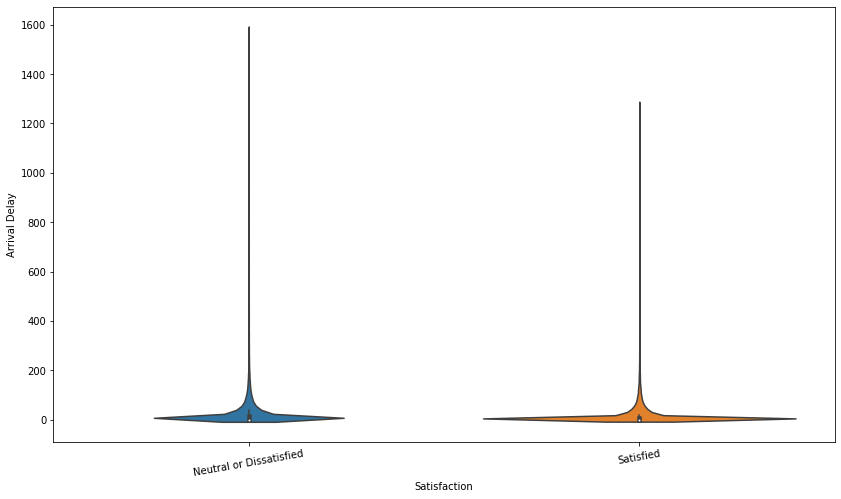

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(x='Satisfaction',y='Arrival Delay',data=SPA,showfliers=False)
plt.xticks(rotation=10)

In [ ]:
#Análisis de numérica vs. categórica
SPA.groupby('Satisfaction')['Arrival Delay'].mean()

Satisfaction
Neutral or Dissatisfied    17.055992
Satisfied                  12.533859
Name: Arrival Delay, dtype: float64

In [ ]:
SPA.groupby('Satisfaction')['Departure Delay'].mean()

Satisfaction
Neutral or Dissatisfied    16.406837
Satisfied                  12.509782
Name: Departure Delay, dtype: float64

In [ ]:
SPA.groupby('Satisfaction')['Flight Distance'].mean()

Satisfaction
Neutral or Dissatisfied     929.715420
Satisfied                  1529.539165
Name: Flight Distance, dtype: float64

In [ ]:
SPA.groupby('Satisfaction')['Arrival Delay'].describe()

,count,mean,std,min,25%,50%,75%,max
Satisfaction,,,,,,,,
Neutral or Dissatisfied,73225.0,17.055992,40.522021,0.0,0.0,0.0,16.0,1584.0
Satisfied,56262.0,12.533859,35.449502,0.0,0.0,0.0,8.0,1280.0



## Manejo de características categóricas


Dividimos los signos en cuantitativos y categóricos:

In [ ]:
numerical_columns = [c for c in SPA.columns if SPA[c].dtype.name != 'category']
numerical_columns.remove('Satisfaction')
categorical_columns = [c for c in SPA.columns if SPA[c].dtype.name == 'category']
data_describe = SPA.describe(include = ['category'])


Dividimos las características categóricas en binarias y no binarias:

In [ ]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']



Veamos los valores únicos para cada característica binaria:

In [ ]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in SPA[col].unique():
        if uniq == SPA[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : First-time, Returning.
Type of Travel : Business, Personal.


Hagamos la binarización:

In [ ]:
SPA[col] == uniq

ID
1         False
2         False
3         False
4         False
5         False
          ...  
129876     True
129877     True
129878     True
129879     True
129880     True
Name: Type of Travel, Length: 129880, dtype: bool

In [ ]:
for col in binary_columns:
    SPA[col] = SPA[col].astype('object')
    k = 0
    for uniq in SPA[col].unique():
        SPA.at[SPA[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(SPA[col].describe(), end = '\n\n')

count     129880
unique         2
top            1
freq       65899
Name: Gender, dtype: int64

count     129880
unique         2
top            1
freq      106100
Name: Customer Type, dtype: int64

count     129880
unique         2
top            0
freq       89693
Name: Type of Travel, dtype: int64




Ahora veamos las características categóricas no binarias:

In [ ]:
SPA[nonbinary_columns]

,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,
1,Business,3,3,4,3,3,3,5,2,5,5,5,3,5,5
2,Business,2,2,3,5,2,5,4,5,5,3,5,2,5,5
3,Business,4,4,4,5,4,3,5,3,5,5,3,4,3,3
4,Business,2,2,3,4,2,5,5,5,4,4,5,2,5,5
5,Business,3,3,3,5,3,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,Economy Plus,4,4,4,4,2,5,1,4,4,4,5,4,4,4
129877,Economy Plus,5,3,5,3,4,5,2,5,2,2,4,3,2,5
129878,Economy Plus,5,2,4,2,1,3,3,4,3,3,4,2,3,5


El siguiente método de vectorización es aplicable a entidades no binarias:

La característica j, que toma valores s, será reemplazada por características s, que toman los valores 0 o 1, dependiendo de cuál sea el valor de la característica original j.

Esta vectorización se realiza mediante el método get_dummies:


In [ ]:
SPA_nonbinary = pd.get_dummies(SPA[nonbinary_columns])
print(SPA_nonbinary.columns)

Index(['Class_Business', 'Class_Economy', 'Class_Economy Plus',
       'Departure and Arrival Time Convenience_0',
       'Departure and Arrival Time Convenience_1',
       'Departure and Arrival Time Convenience_2',
       'Departure and Arrival Time Convenience_3',
       'Departure and Arrival Time Convenience_4',
       'Departure and Arrival Time Convenience_5', 'Ease of Online Booking_0',
       'Ease of Online Booking_1', 'Ease of Online Booking_2',
       'Ease of Online Booking_3', 'Ease of Online Booking_4',
       'Ease of Online Booking_5', 'Check-in Service_0', 'Check-in Service_1',
       'Check-in Service_2', 'Check-in Service_3', 'Check-in Service_4',
       'Check-in Service_5', 'Online Boarding_0', 'Online Boarding_1',
       'Online Boarding_2', 'Online Boarding_3', 'Online Boarding_4',
       'Online Boarding_5', 'Gate Location_0', 'Gate Location_1',
       'Gate Location_2', 'Gate Location_3', 'Gate Location_4',
       'Gate Location_5', 'On-board Service_0', 'On-b

In [ ]:
len(SPA_nonbinary.columns)

86


## **Normalización de características cuantitativas**


Tenemos las siguientes características cuantitativas:

In [ ]:
SPA_numerical = SPA[numerical_columns]
SPA_numerical.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Realicemos una estandarización (transformación lineal que reduce todos los valores a la media cero y una desviación estándar) de todas las características cuantitativas:

In [ ]:
SPA_numerical = (SPA_numerical - SPA_numerical.mean(axis = 0))/SPA_numerical.std(axis = 0)

In [ ]:
SPA_numerical.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,1.298800e+05,1.298800e+05,1.298800e+05,1.294870e+05
mean,-8.840753e-17,1.015374e-16,-1.750644e-18,-2.633936e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.144797e+00,-1.162277e+00,-3.864796e-01,-3.923274e-01
25%,-8.219896e-01,-7.782991e-01,-3.864796e-01,-3.923274e-01
50%,3.783516e-02,-3.472009e-01,-3.864796e-01,-3.923274e-01
75%,7.653792e-01,5.550977e-01,-7.128007e-02,-5.436354e-02
max,3.014152e+00,3.802370e+00,4.142999e+01,4.078727e+01


Unimos todas las columnas transformadas en una tabla:

In [ ]:
target = SPA['Satisfaction']
SPA = pd.concat((SPA_numerical, SPA_nonbinary, SPA[binary_columns]), axis = 1)
print(SPA.shape)

(129880, 93)


# **Predecir la satisfaccion del cliente**

**¿Podemos predecir la satisfacción de un cliente?**

Trataremos esto como un problema de clasificación binaria, donde intentaremos crear un modelo que prediga si un cliente estaba **Satisfecho** o **Insatisfecho** con la experiencia y/o el servicio que brindó una aerolínea.

In [ ]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd '/content/dgrive/MyDrive/Python/Colab Notebooks (1)/Entrega de trabajos/Desafio 1 /Satisfacción de los pasajeros'
SPA= pd.read_csv('/content/dgrive/MyDrive/Python/Colab Notebooks/Entrega de trabajos/Desafio 1 /Satisfacción de los pasajeros/airline_passenger_satisfaction.csv',index_col=0)
SPA.head()

[Errno 2] No such file or directory: '/content/dgrive/MyDrive/Python/Colab Notebooks (1)/Entrega de trabajos/Desafio 1 /Satisfacción de los pasajeros'
/content


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# Echa un vistazo a las primeras instancias.
pd.set_option('display.max_columns', None)
SPA.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
SPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [ ]:
SPA.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Observe mejor los datos categóricos
cat_columns = SPA.select_dtypes(include = ['object'])
unique_values = cat_columns.nunique(dropna=False)
print (unique_values)

Gender            2
Customer Type     2
Type of Travel    2
Class             3
Satisfaction      2
dtype: int64


Tenemos 5 columnas categóricas, la mayoría de ellas con solo 2 valores posibles (esto incluye el objetivo). El último (clase de cliente) tiene 3 valores categóricos.

## Codificación de teclas de acceso rápido
Usaremos la codificación de teclas de acceso rápido para manejar los datos categóricos:

In [ ]:
SPA = pd.get_dummies(SPA, drop_first = True)
print("The SPA shape is : {} ".format(SPA.shape))
SPA.head()


The SPA shape is : (129880, 24) 


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,1,0,0,0,0,0
2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,0,1,0,0,0,1
3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,1,0,0,0,1
4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,1,0,0,0,1
5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,0,1,0,0,0,1


In [ ]:
SPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     129880 non-null  int64  
 1   Flight Distance                         129880 non-null  int64  
 2   Departure Delay                         129880 non-null  int64  
 3   Arrival Delay                           129487 non-null  float64
 4   Departure and Arrival Time Convenience  129880 non-null  int64  
 5   Ease of Online Booking                  129880 non-null  int64  
 6   Check-in Service                        129880 non-null  int64  
 7   Online Boarding                         129880 non-null  int64  
 8   Gate Location                           129880 non-null  int64  
 9   On-board Service                        129880 non-null  int64  
 10  Seat Comfort                            1298

In [ ]:
SPA.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.492616,0.816908,0.309416,0.448945,0.072459,0.434463
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.499947,0.386743,0.462255,0.497388,0.259248,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Solo una columna (retraso en la llegada) tiene valores faltantes y el número no es grande. Podríamos simplemente eliminar las instancias relevantes, pero algo en los diagramas de correlación anteriores indica que tal vez podríamos imputarlos. Para esto, primero queremos verificar cuánto se correlacionan el retraso de llegada y el retraso de salida:

Correlation between departure and arrival delays:  0.9652911835463334


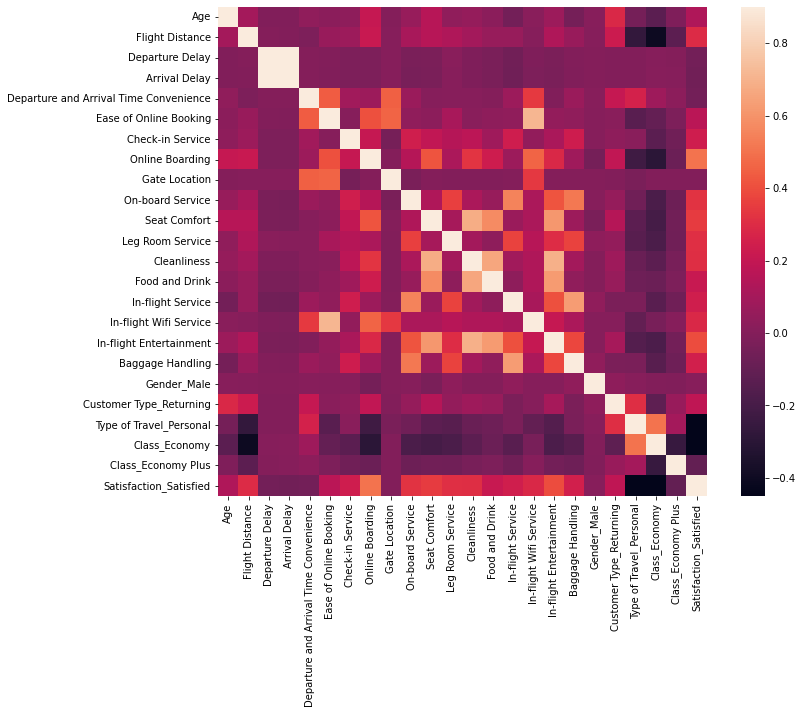

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = SPA.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
print ('Correlation between departure and arrival delays: ', corrmat['Arrival Delay']['Departure Delay'])

Es muy obvio que los dos retrasos están altamente correlacionados (véanse las dos celdas más blancas de la diagonal) y, de hecho, el valor de correlación es 0,965. Por lo tanto, podemos usar los datos de retraso de salida para imputar los datos de retraso de llegada que faltan

In [ ]:
# Fijar datos por imputación
SPA['Arrival Delay'].fillna(SPA['Departure Delay'], inplace = True)
print (SPA.isnull().sum())

Age                                       0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Gender_Male                               0
Customer Type_Returning                   0
Type of Travel_Personal                   0
Class_Economy                             0
Class_Economy Plus              

# Outliers
La mayoría de las columnas de nuestros datos tienen un rango de posibilidades relativamente estrecho (como los valores de 0 a 5). En este contexto, se destacan la distancia de los vuelos y los retrasos en las salidas y llegadas. Miramos más de cerca:

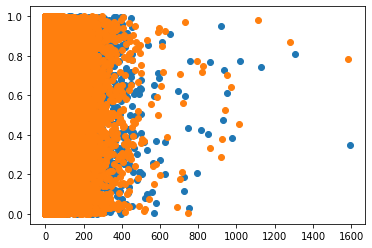

In [ ]:
plt.scatter (SPA['Departure Delay'], np.random.rand(SPA.shape[0]))
plt.scatter (SPA['Arrival Delay'], np.random.rand(SPA.shape[0]))

Parece que muy pocos casos tienen un retraso (ya sea en la llegada o en la salida) de > 500 minutos. Probemos esta hipótesis:

In [ ]:
print ((SPA['Arrival Delay']> 500).sum())
print ((SPA['Departure Delay']> 500).sum())
print (((SPA['Departure Delay']> 500) + (SPA['Arrival Delay']> 500)).sum())


42
43
46


Entonces, al descartar solo 46 instancias, nos deshacemos de todos los retrasos de más de 500 minutos. Vamos a hacer eso.

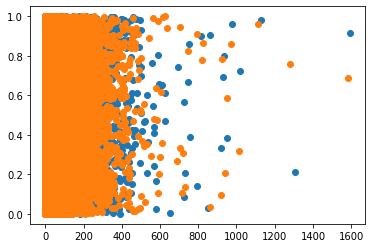

In [ ]:
data = SPA[(SPA['Arrival Delay'] <= 500)]
data = SPA[(SPA['Departure Delay'] <= 500)]
plt.scatter (SPA['Departure Delay'], np.random.rand(SPA.shape[0]))
plt.scatter (SPA['Arrival Delay'], np.random.rand(SPA.shape[0]))

Siguiente - las distancias de vuelo.

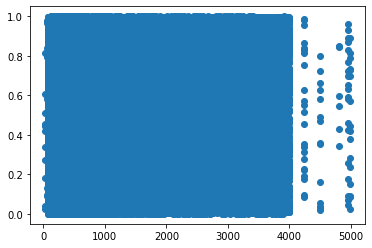

In [ ]:
plt.scatter (SPA['Flight Distance'], np.random.rand(SPA.shape[0]))

Aquí no tenemos mucho que ganar eliminando las largas distancias ya que hasta alrededor de 4000 millas los datos son bastante densos, así que dejémoslos como están.

# Preparar datos para el modelado
Ahora que los datos son limpios y numéricos, queremos separar las características de los objetivos y dividirlos entre conjuntos de entrenamiento y prueba. También eliminamos la columna de índice redundante (sin nombre) en el proceso, dejando 23 características para modelar. Finalmente, normalizamos los datos para que cada columna tenga valores entre 0 y 1.

In [ ]:
# Prepárese para el modelado: migre a Numpy y divídalo a conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

used_data = SPA.drop (['Satisfaction_Satisfied'], axis=1)
x = used_data.values 
y = SPA['Satisfaction_Satisfied'].values

# Normalice features
for feature in range (x.shape[1]):
    min = x[:,feature].min()
    max = x[:,feature].max()
    x[:,feature] = (x[:,feature]-min) / (max-min)
    
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)
print("The training data size is : {} ".format(x_train.shape))
print("The test data size is : {} ".format(x_test.shape))

The training data size is : (103904, 23) 
The test data size is : (25976, 23) 


Ahora podemos comenzar a modelar.

# Modelo de árbol de decisión
Podría decirse que la forma más sencilla de predecir los objetivos a partir de las características es mediante un árbol de decisión. Usamos el modelo sklearn, con profundidad sin restricciones:

In [ ]:
# Clasificador de árboles de decisión
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=None)
dct.fit(x_train,y_train)
dct_training_score = 100*dct.score(x_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100*dct.score(x_test, y_test)
print("Decision Tree accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_training_score, dct_test_score))

Tree Depth: 47
Tree Leaves: 4049
Decision Tree accuracy. Train : 100.00%, Test: 94.46%. 


Como era de esperar, el árbol de decisión puede modelar perfectamente el conjunto de entrenamiento. De manera más informativa, obtiene más del 94% del conjunto de prueba correcto, lo que significa que los datos son aptos para el aprendizaje automático. También aprendemos que el árbol perfecto tiene una profundidad de 36 y más de 4000 hojas, que es bastante grande. Intentemos ver cómo afecta la profundidad accuracy:

[ 78.68  86.11  88.49  88.91  90.51  91.09  92.56  93.74  94.34  94.84
  95.42  95.85  96.37  96.79  97.14  97.45  97.81  98.15  98.42  98.64
  98.85  99.03  99.2   99.3   99.43  99.53  99.62  99.69  99.77  99.81
  99.87  99.89  99.91  99.93  99.93  99.94  99.95  99.97  99.97  99.97
  99.98  99.99  99.99 100.   100.   100.   100.  ]
[78.7  85.78 88.29 88.62 90.51 91.09 92.54 93.6  94.07 94.44 94.79 95.03
 95.28 95.41 95.36 95.36 95.07 95.03 95.09 94.85 94.75 94.78 94.67 94.71
 94.61 94.64 94.49 94.47 94.38 94.49 94.47 94.39 94.39 94.39 94.39 94.38
 94.43 94.52 94.29 94.3  94.34 94.37 94.44 94.33 94.34 94.42 94.33]


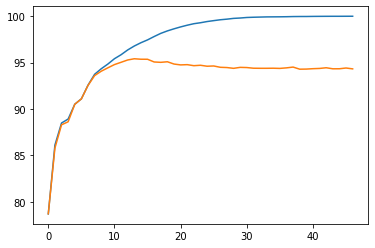

In [ ]:
# Dependencia de la profundidad del árbol
max_d = dct.get_depth()
dct_training_score, dct_test_score = np.zeros(max_d), np.zeros(max_d)
for i in range (max_d):
  dct = DecisionTreeClassifier(max_depth=i+1)
  dct.fit(x_train,y_train)
  dct_training_score[i] = 100*dct.score(x_train, y_train)
  dct_test_score[i] = 100*dct.score(x_test, y_test)

print (np.around (dct_training_score, decimals=2))  
print (np.around (dct_test_score, decimals=2))
plt.plot (dct_training_score)
plt.plot(dct_test_score)


Parece que el árbol tiene una precisión de entrenamiento y prueba similar hasta alrededor de la profundidad 7 u 8, donde comienza a desarrollarse una brecha entre los conjuntos de entrenamiento y prueba (=overlearning). Esto significa que podemos limitar la profundidad del árbol a 8 para estimadores futuros. A continuación, vemos las características importantes en el árbol final:


In [ ]:
# Obtenga las características más importantes del árbol
features = used_data.columns
importances = dct.feature_importances_
leading_indices = (-importances).argsort()[:23]
print ("Leading features sorted by importance:")
for i in range (23):
    print (i+1, features[leading_indices[i]], round(100*importances[leading_indices[i]],2), '%')

Leading features sorted by importance:
1 Online Boarding 36.16 %
2 In-flight Wifi Service 17.89 %
3 Type of Travel_Personal 15.51 %
4 In-flight Entertainment 4.34 %
5 Customer Type_Returning 3.1 %
6 Flight Distance 2.89 %
7 Check-in Service 2.83 %
8 Age 2.17 %
9 Leg Room Service 2.17 %
10 Baggage Handling 1.86 %
11 Gate Location 1.8 %
12 In-flight Service 1.52 %
13 Seat Comfort 1.46 %
14 Class_Economy 1.26 %
15 Cleanliness 0.96 %
16 Arrival Delay 0.85 %
17 On-board Service 0.84 %
18 Departure Delay 0.76 %
19 Departure and Arrival Time Convenience 0.47 %
20 Food and Drink 0.42 %
21 Ease of Online Booking 0.31 %
22 Class_Economy Plus 0.2 %
23 Gender_Male 0.2 %



Hay 3 características que se destacan: Online Boarding (36,16%), In-flight Wifi Service (17,89%) y Type of Travel_Personal (15,51%). Juntos abarcan casi el 70% de la importancia total. La siguiente función hacia abajo (inflight_entertainment) tiene una importancia mucho menor (alrededor del 5%). Intentemos rehacer el análisis usando solo los tres parámetros principales:

In [ ]:
# Árbol basado en las 3 mejores características
leading_x = SPA[['Online Boarding', 'In-flight Wifi Service', 'Type of Travel_Personal']]
lx_train, lx_test, ly_train, ly_test = train_test_split (leading_x, y, test_size=0.2, random_state=42)

dct = DecisionTreeClassifier(max_depth=None)
dct.fit(lx_train,ly_train)
dct_training_score = 100*dct.score(lx_train, ly_train)
print ('Tree Depth on leading 3 parameters:', dct.get_depth())
print ('Tree Leaves using leading 3 parameters:', dct.get_n_leaves())
dct_test_score = 100*dct.score(lx_test, ly_test)
print("Decision Tree accuracy for leading 3 parameters. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_training_score, dct_test_score))

Tree Depth on leading 3 parameters: 9
Tree Leaves using leading 3 parameters: 45
Decision Tree accuracy for leading 3 parameters. Train : 89.16%, Test: 88.92%. 


**Por lo tanto, nuestros 3 parámetros principales pueden predecir tanto los conjuntos de entrenamiento como los de prueba con una precisión de aproximadamente el 89 %, con un árbol mucho más simple (profundidad 9 y solo 45 hojas) **

# Otros algoritmos basados ​​en árboles
Volvamos al conjunto de datos completo y veamos si otros algoritmos basados ​​en árboles pueden mejorar los resultados de un solo árbol. Primero, probaremos Adaboost.


In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=500)
adb.fit(x_train,y_train)
adaboost_training_score = 100*adb.score(x_train,y_train)
adaboost_test_score = 100*adb.score(x_test,y_test)
print("Adaboost accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(adaboost_training_score, adaboost_test_score))

Adaboost accuracy. Train : 93.03%, Test: 92.78%. 



Parece que incluso con 500 estimadores (el valor predeterminado es 50) Adaboost no puede lograr mejores resultados que un árbol de decisión (93,03 % frente a 92,78 %). A continuación, intentaremos aumentar el gradiente:

In [ ]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
# Try 100 estimators
gdb = GradientBoostingClassifier(n_estimators=100)
gdb.fit(x_train,y_train)
gradient_boost_training_score = 100*gdb.score(x_train,y_train)
gradient_boost_test_score = 100*gdb.score(x_test,y_test)
print("Gradient boost accuracy for 100 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(gradient_boost_training_score, gradient_boost_test_score))
# Try 200 estimators
gdb = GradientBoostingClassifier(n_estimators=200)
gdb.fit(x_train,y_train)
gradient_boost_training_score = 100*gdb.score(x_train,y_train)
gradient_boost_test_score = 100*gdb.score(x_test,y_test)
print("Gradient boost accuracy for 200 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(gradient_boost_training_score, gradient_boost_test_score))

Gradient boost accuracy for 100 estimators. Train : 94.24%, Test: 94.06%. 
Gradient boost accuracy for 200 estimators. Train : 95.30%, Test: 95.18%. 


Aquí finalmente superamos el árbol de decisión único con un puntaje de prueba> 95%, pero se necesitaron 200 estimadores para eso y 100 no fueron suficientes. A continuación, probamos un bosque aleatorio:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Try 100 estimators
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
random_forest_training_score = 100*rfc.score(x_train,y_train)
random_forest_test_score = 100*rfc.score(x_test,y_test)
print("Random forest accuracy, 100 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(random_forest_training_score, random_forest_test_score))
# Try 200 estimators
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
random_forest_training_score = 100*rfc.score(x_train,y_train)
random_forest_test_score = 100*rfc.score(x_test,y_test)
print("Random forest accuracy, 200 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(random_forest_training_score, random_forest_test_score))

Random forest accuracy, 100 estimators. Train : 100.00%, Test: 96.34%. 
Random forest accuracy, 200 estimators. Train : 100.00%, Test: 96.29%. 


El bosque aleatorio parece funcionar mejor que todos los métodos de refuerzo de árboles, con más del 96 % de precisión en el conjunto de prueba. Además, 100 estimadores parecen llegar a una meseta, y pasar a 200 estimadores casi no muestra ninguna mejora.

# Modelos no basados ​​en árboles

Aunque se ha logrado excelentes resultados con árboles (especialmente con bosques aleatorios), voy a probar otros modelos, no basados ​​en árboles.

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit (x_train, y_train)
nbc_training_score = 100*nbc.score(x_train,y_train)
nbc_test_score = 100*nbc.score(x_test,y_test)
print("Naive Bayes accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(nbc_training_score, nbc_test_score))

Naive Bayes accuracy. Train : 85.88%, Test: 86.05%. 


**K-Nearest Neighbors**

In [ ]:
# K Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit (x_train, y_train)
knn_training_score = 100*knn.score(x_train,y_train)
knn_test_score = 100*knn.score(x_test,y_test)
print("KNN accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_score, knn_test_score))

KNN accuracy. Train : 94.94%, Test: 92.98%. 


**Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000)
logr.fit (x_train, y_train)
logr_training_score = 100*logr.score(x_train,y_train)
logr_test_score = 100*logr.score(x_test,y_test)
print("Logistic Regression accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(logr_training_score, logr_test_score))

Logistic Regression accuracy. Train : 87.45%, Test: 87.39%. 


Hasta ahora, este tiene la mejor puntuación de todos los modelos que no son de árbol, pero está muy por detrás de los modelos basados ​​en árboles. Para la regresión logística también es posible observar los coeficientes del modelo. Las características que tienen el mayor impacto en las predicciones deben tener altos coeficientes de valor absoluto:

In [ ]:
# Look at coefficients
coefficients = logr.coef_[0]
leading_indices = (-coefficients).argsort()[:23]
print ("Sorted coefficients for features:")
for i in range (23):
    print (i+1, features[leading_indices[i]], round(coefficients[leading_indices[i]],2))

Sorted coefficients for features:
1 Online Boarding 3.0
2 Customer Type_Returning 2.02
3 In-flight Wifi Service 2.01
4 Check-in Service 1.64
5 On-board Service 1.51
6 Leg Room Service 1.22
7 Cleanliness 1.12
8 In-flight Service 0.61
9 Baggage Handling 0.55
10 Seat Comfort 0.33
11 In-flight Entertainment 0.3
12 Gate Location 0.13
13 Gender_Male 0.06
14 Flight Distance -0.07
15 Food and Drink -0.13
16 Departure and Arrival Time Convenience -0.66
17 Class_Economy -0.71
18 Age -0.72
19 Ease of Online Booking -0.78
20 Class_Economy Plus -0.83
21 Departure Delay -1.92
22 Type of Travel_Personal -2.72
23 Arrival Delay -5.29


Vemos que las características que destacaron en el árbol de decisión (embarque en línea, servicio de wifi a bordo y viajes personales) son las dos primeras y las últimas características de esta lista. Sin embargo, se destacan características adicionales como la lealtad del cliente, la clase del cliente, el servicio a bordo y el servicio de facturación. Todas las demás características tienen un coeficiente inferior a 0,3 en valor absoluto, por lo que probablemente sean menos importantes.

**Máquinas de vectores de soporte**

Finalmente, pasamos a SVM. Ajustar un modelo SVM a los datos requiere mucho tiempo, ya que su tiempo debe ser una función cuadrática de la cantidad de instancias utilizadas. Esto lo podemos ver a continuación:


Sizes:  [  10 1000 2000 3000 4000 5000 6000]
Times:  [0.00255987 0.03030029 0.09920822 0.20967606 0.35365574 0.50915326
 1.15718949]
Training Scores: [43.60563597 90.04465661 91.41996458 91.90599014 92.34485679 92.76158762
 92.80297197]
Test scores: [43.44394826 90.28718817 91.65383431 91.93101324 92.49307053 92.96658454
 92.76639975]
Estimated time for training on 100,000 instances:  176.80883386842257 minutes.


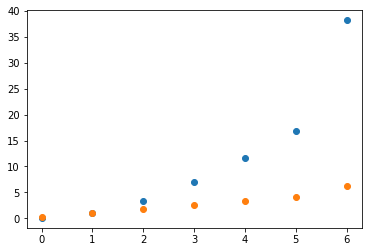

In [ ]:
# SVM - default kernel
import time
from sklearn.svm import SVC
svc = SVC()
sizes = np.array([10, 1000, 2000, 3000, 4000, 5000, 6000])
times = np.zeros(len(sizes))
svc_training_score = np.zeros(len(sizes))
svc_test_score = np.zeros(len(sizes))
for ind, size in enumerate(sizes):
    select = np.random.choice (np.arange(len(y_train)), size=size)
    x_sample = x_train[select,:]
    y_sample = y_train[select]
    start_time = time.monotonic() 
    svc.fit (x_sample, y_sample)
    end_time = time.monotonic() 
    times[ind] = (end_time - start_time)
    svc_training_score[ind] = 100*svc.score(x_train,y_train)
    svc_test_score[ind] = 100*svc.score(x_test,y_test)
print ("Sizes: ", sizes)
print ("Times: ", times)
times /= times[1]
sizes = sizes / sizes[1]
plt.scatter (sizes, times)
plt.scatter (sizes, np.sqrt(times))
print ("Training Scores:", svc_training_score)
print ("Test scores:", svc_test_score)
print("Estimated time for training on 100,000 instances: ", times[-1]*(100/6)**2 / 60, "minutes.")


La gráfica de tiempos original parece ser cuadrática y, de hecho, la gráfica de sus raíces cuadradas parece lineal. Esto muestra la dependencia cuadrática del tiempo de entrenamiento en el número de instancias. Se estima que la capacitación en todo el conjunto de datos llevará más de 3 horas. Por otro lado, la precisión de las pruebas no parece mejorar mucho a medida que aumenta la cantidad de instancias de capacitación (el primer valor es muy bajo pero se basa solo en 10 instancias, los demás rondan el 65 % y se basan en miles de instancias). instancias).
Ahora deberíamos buscar una mejor función del núcleo para mejorar esta precisión:

In [ ]:
# SVM - optimize Kernel
kernels = (['linear', 'poly', 'rbf', 'sigmoid'])
select = np.random.choice (np.arange(len(y_train)), size=1000)
x_sample = x_train[select,:]
y_sample = y_train[select]
for ker in (kernels):
    svc = SVC(kernel=ker)
    svc.fit (x_sample, y_sample)
    svc_training_score = 100*svc.score(x_train,y_train)
    svc_test_score = 100*svc.score(x_test,y_test)
    print("SVC kernel: ", ker, ". Train : {:.2f}%, Test: {:.2f}%. ".format(svc_training_score, svc_test_score))

SVC kernel:  linear . Train : 87.16%, Test: 87.27%. 
SVC kernel:  poly . Train : 90.50%, Test: 90.78%. 
SVC kernel:  rbf . Train : 89.91%, Test: 90.07%. 
SVC kernel:  sigmoid . Train : 37.82%, Test: 38.03%. 



Parece que el núcleo lineal lo hizo mucho mejor que los demás (incluido el predeterminado, que era la función de base radial o RBF). De hecho, con un núcleo lineal, el algoritmo SVC (87 %) funciona mejor que todos los algoritmos que no son de árbol, aunque solo ligeramente mejor que la regresión logística (86,5 %) y el bayesiano ingenuo (86 %). Como se mencionó, esto puede mejorar ligeramente si entrenamos con más datos, pero esto llevará mucho tiempo y no se espera que genere grandes ganancias. El último parámetro que queremos optimizar para SVM es el parámetro de regularización C, ya que a veces tiene un gran efecto en los resultados.

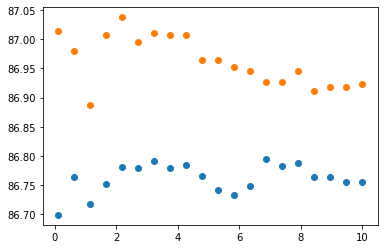

In [ ]:
# SVM - optimize C
from sklearn.svm import SVC
C_values = np.linspace(0.1, 10.0, num=20)
svc_training_score = np.zeros (len(C_values))
svc_test_score = np.zeros (len(C_values))
select = np.random.choice (np.arange(len(y_train)), size=1000)
x_sample = x_train[select,:]
y_sample = y_train[select]
for i, C in enumerate(C_values):
    svc = SVC(kernel='linear', C=C)
    svc.fit (x_sample, y_sample)
    svc_training_score[i] = 100*svc.score(x_train,y_train)
    svc_test_score[i] = 100*svc.score(x_test,y_test)
plt.scatter (C_values, svc_training_score)
plt.scatter (C_values, svc_test_score)


Entonces, después de todo, no hay un efecto dramático de C en el rendimiento.

Usando toda la información anterior, veamos si podemos apilar varios modelos y obtener algo mejor que el mejor de ellos. Usaremos un árbol de decisión de profundidad 8 (donde sabemos que comienza el sobreajuste), aumento de gradiente, bosque aleatorio, bayesiana ingenua y regresión logística:

In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier
estimators = [\
    ('dct', DecisionTreeClassifier(max_depth=8)), \
    ('gdb', GradientBoostingClassifier(n_estimators=200)), \
    ('rfc', RandomForestClassifier(n_estimators=100)), \
    ('nbc', GaussianNB()), \
    ('logr', LogisticRegression(max_iter=1000)) \
#   , ('svc', SVC(kernel='linear'))
             ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
clf_training_score = 100*clf.score(x_train,y_train)
clf_test_score = 100*clf.score(x_test,y_test)
print("Stacked classifier accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(clf_training_score, clf_test_score))


Stacked classifier accuracy. Train : 100.00%, Test: 96.19%. 


Este resultado es tan bueno como el bosque aleatorio por sí solo. Por lo tanto, nuestra conclusión final es que el bosque aleatorio es el mejor modelo, todos los algoritmos de árbol en general funcionan mejor en este conjunto de datos que todos los algoritmos que no son de árbol, y que el apilamiento no es útil para mejorar el resultado más allá del mejor modelo único que tiene alrededor del 96 %. precisión.

# **Conclusiones sobre la muestra considerada:**

La muestra está más o menos equilibrada (56,7% sobre 43,3%).
El número de hombres y mujeres en esta muestra es aproximadamente el mismo.

La gran mayoría de los clientes de la aerolínea son clientes habituales.
La mayoría de nuestros clientes volaron por negocios más que por razones personales.
Aproximadamente la mitad de los pasajeros estaban en clase ejecutiva.
Más del 60% de los pasajeros se mostraron satisfechos con el servicio de transporte de equipaje (puntuación 4-5 sobre 5).

Más del 50 % de los pasajeros se sentían cómodos sentados en sus asientos (puntuación de 4 a 5 sobre 5).

Hubo una fuerte correlación (96%) entre las características 'Retraso de salida en minutos' y 'Retraso de llegada en minutos' (lo cual es bastante lógico y se discutió en detalle anteriormente).
La mayoría de los clientes regulares de la aerolínea tienen entre 30 y 50 años (un promedio de poco más de 40). El rango de edad de los clientes no habituales es algo más reducido (de 25 a 40 años, con una media algo inferior a los 30).

Los clientes cuya distancia de vuelo es larga tienden a volar en clase ejecutiva.
Cuanta más distancia viaja un pasajero de avión (respectivamente, cuanto más tiempo está en vuelo), más satisfecho está con el entretenimiento a bordo y el espacio extra para las piernas (en promedio).

La mayoría de los pasajeros que volaron en Economy Plus o Economy Class quedaron insatisfechos con el vuelo, y los que tuvieron la suerte de volar en Business Class quedaron satisfechos.
Casi todos los pasajeros que calificaron el servicio wifi con un 5 sobre 5 se mostraron satisfechos con el vuelo.

La mayoría de los pasajeros que calificaron la comodidad de los asientos y el espacio adicional para las piernas con 4 y 5 puntos sobre 5 se mostraron satisfechos con el vuelo.